# Homework 6

TFCB 2022

Due date: Nov 17, 2022 1PM

In this homework, we will work through a series of manipulations to analyze a published deep sequencing
dataset using `tidyverse` functions.

In the process, we will learn some new functions in `tidyverse` and apply
them to our data analysis.

For more information about the data used in this homework, see
[this page](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE89183).


In [16]:
library(tidyverse) #Loads the library

## Problem 1

**10 points**

For each of the following functions, provide a <100 character description
(in your own words) and a URL reference.

1. `!`
2. `is.na`
3. `is.numeric`
4. `anti_join`
5. `desc`
6. `dplyr::slice`
7. `dplyr::across`


1.! (from https://www.tutorialspoint.com/computer_programming/computer_programming_operators.htm#:~:text=An%20operator%20in%20a%20programming,operation%20and%20produce%20final%20result.): "not" function, can use to test "not equal to"

2.is.na (from https://www.rdocumentation.org/packages/ursa/versions/3.9.4/topics/is.na): sets deature to "NA"

3.is.numeric (https://www.geeksforgeeks.org/check-if-an-object-is-of-type-numeric-in-r-programming-is-numeric-function/): tests if an input is numbers

4.anti_join (https://dplyr.tidyverse.org/reference/filter-joins.html): returns ata points that do not match a list

5.desc (https://dplyr.tidyverse.org/reference/desc.html?q=desc#ref-usage): sorts list in descending order

6.dplyr::slice (https://dplyr.tidyverse.org/reference/slice.html): allows the manipulation of a tibble row

7.dplyr::across (https://dplyr.tidyverse.org/reference/across.html): applies a given function across multiple columns

## Problem 2

**10 points**

Add a comment above each code line below explaining what the code line does and/or why
that code line is necessary.

Keep each comment to less than 2 lines per line of code and < 80 chars per line.

In [17]:
#reads in tsv file 
#Selects specific columns within the file
#filters out NA in ccds_id
#prints the modified table
annotations <- read_tsv("ftp://ftp.ebi.ac.uk/pub/databases/genenames/new/tsv/locus_groups/protein-coding_gene.txt") %>%
  select(ensembl_gene_id, symbol, name, gene_group, ccds_id) %>%
  filter(!is.na(ccds_id)) %>%
  print()

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details, e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 19229 Columns: 54
── Column specification ────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (39): hgnc_id, symbol, name, locus_group, locus_type, status, location,...
dbl   (3): entrez_id, homeodb, orphanet
lgl   (8): mirbase, snornabase, imgt, kznf_gene_catalog, mamit-trnadb, lncrn...
date  (4): date_approved_reserved, date_symbol_changed, date_name_changed, d...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 18,785 × 5
   ensembl_gene_id symbol  name                               gene_group ccds_id
   <chr>           <chr>   <chr>                              <chr>      <chr>  
 1 ENSG00000121410 A1BG    alpha-1-B glycoprotein             Immunoglo… CCDS12…
 2 ENSG00000148584 A1CF    APOBEC1 complementation factor     RNA bindi… CCDS72…
 3 ENSG00000175899 A2M     alpha-2-macroglobulin              Alpha-2-m… CCDS44…
 4 ENSG00000166535 A2ML1   alpha-2-macroglobulin like 1       Alpha-2-m… CCDS85…
 5 ENSG00000184389 A3GALT2 alpha 1,3-galactosyltransferase 2  Glycosylt… CCDS60…
 6 ENSG00000128274 A4GALT  alpha 1,4-galactosyltransferase (… Alpha 1,4… CCDS14…
 7 ENSG00000118017 A4GNT   alpha-1,4-N-acetylglucosaminyltra… Alpha 1,4… CCDS30…
 8 ENSG00000094914 AAAS    aladin WD repeat nucleoporin       WD repeat… CCDS53…
 9 ENSG00000081760 AACS    acetoacetyl-CoA synthetase         Acyl-CoA … CCDS92…
10 ENSG00000114771 AADAC   arylacetamide deacetylase          Lipases|A… CCDS33…
# … w

In [18]:
#read in tsv file
#change 'ENSEMBL gene' column to tidy structure
#print table
data <- read_tsv("ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE89nnn/GSE89183/suppl/GSE89183_Counts.txt.gz") %>%
  rename(ensembl_gene_id = `ENSEMBL gene`) %>%
  print()

Rows: 63677 Columns: 15
── Column specification ────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): ENSEMBL gene
dbl (14): CD34_shTSR2_RNA_1, CD34_shTSR2_RNA_2, CD34_shRPL5_RNA_1, CD34_shRP...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 63,677 × 15
   ensembl_gene_id CD34_shTSR2_RNA_1 CD34_shTSR2_RNA_2 CD34_shRPL5_RNA_1
   <chr>                       <dbl>             <dbl>             <dbl>
 1 ENSG00000000003                48                56                40
 2 ENSG00000000005                 0                 2                 0
 3 ENSG00000000419               880               744              1116
 4 ENSG00000000457               124               113               149
 5 ENSG00000000460               249               262               289
 6 ENSG00000000938                89                64               204
 7 ENSG00000000971               106                86               241
 8 ENSG00000001036               897               613              1487
 9 ENSG00000001084               965              1027              1036
10 ENSG00000001167               721               835               498
# … with 63,667 more rows, and 11 more variables: CD34_shRPL5_RNA_2 <dbl>,
#   CD34_shRPL5_RPF_1 <db

## Problem 3

**10 points**

Using the code below:

1. Convert both axes to `log10` instead of linear scales.
2. Show axis tick labels as 10^0^, 10^1^, 10^2^,10^3^, 10^4^, 10^5^ for both axes.
3. There are too many points overlapping in certain regions. Use a different
`geom_` function to convey to your reader how many overlapping points are present
in each region.

Warning message:
“Removed 2 rows containing non-finite values (`stat_sum()`).”


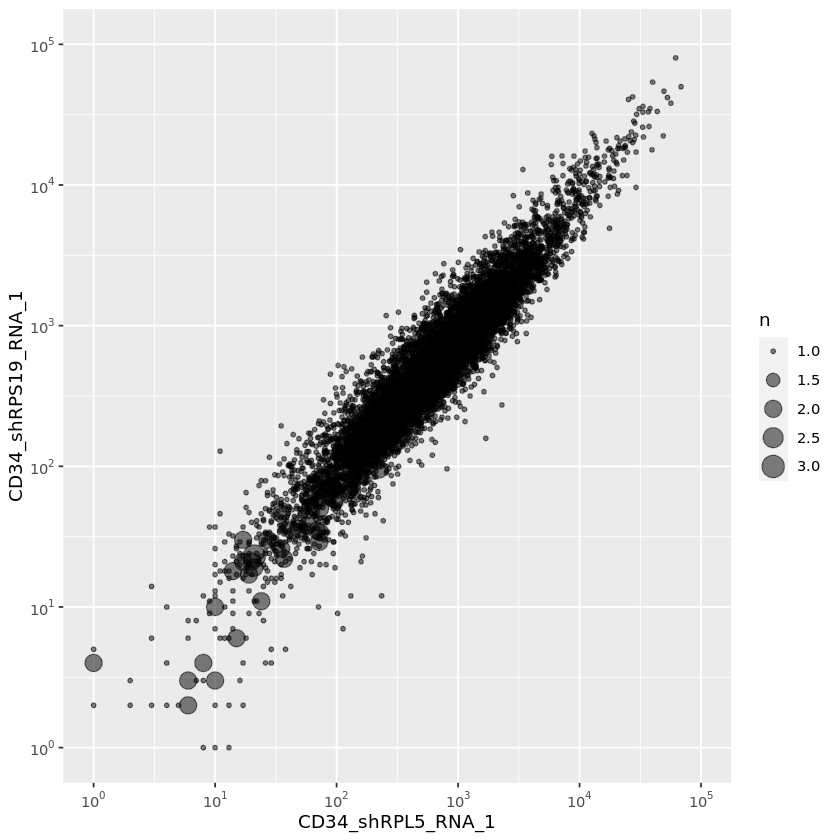

In [19]:
library(scales)
#remove data that will result in errors when graphed logarithmically 
df_new <- filter_if(data, is.numeric, all_vars((.) != 0))
#graph data
df_new %>%
  select(CD34_shRPL5_RNA_1, CD34_shRPS19_RNA_1) %>%
  #plot data
  ggplot(aes(x = CD34_shRPL5_RNA_1, y = CD34_shRPS19_RNA_1)) +
  geom_count(alpha=0.5) +
  #change axes to log10 scale
  scale_x_log10(limits=c(1, 100000), breaks = trans_breaks("log10", function(x) 10^x), labels = trans_format("log10", math_format(10^.x)))+
  scale_y_log10(limits=c(1, 100000), breaks = trans_breaks("log10", function(x) 10^x), labels = trans_format("log10", math_format(10^.x)))

#used STHDA as a reference for scales library, tidyverse ggplot2 reference for density plot, Statology for zero removal 

**In problems 4 through 6, assign the result of your operation back to the `data`
variable.**

## Problem 4

**10 points**

Write a code cell to select the following columns from the `data` variable you created above and reassign back to `data`.

Columns to select: `ensembl_gene_id`, columns that have either `RPL5`, `RPS19`, or `Luc` in their name.

Instead of listing every column, use [`matches`](https://tidyselect.r-lib.org/reference/starts_with.html) and a succinct [regular expression](https://stringr.tidyverse.org/articles/regular-expressions.html) to select the above columns.

In [20]:
data<- data %>% 
  select(ensembl_gene_id, contains('RPL5'), contains('RPS19'), contains('Luc'))

## Problem 5

**10 points**

Write a code cell to filter the result from Problem 4 to include only rows where each of the 12 numerical columns you selected has 50 counts or more  and reassign back to `data`.
This is a simple way to avoid genes that have very low counts.

You might be tempted to do this step separately for each of the 12 columns, but instead use the `across` function you learned above or the `pivot_longer` function from the class (either way is fine).

In [21]:
#filter rows > 0 reads for mRNAs
data<- data %>%
  filter(across(!contains('ensembl_gene_id'), ~. >=50))
print(data)

Warning message:
“Using `across()` in `filter()` is deprecated, use `if_any()` or `if_all()`.”


# A tibble: 4,239 × 13
   ensembl_gene_id CD34_shRPL5_RNA_1 CD34_shRPL5_RNA_2 CD34_shRPL5_RPF_1
   <chr>                       <dbl>             <dbl>             <dbl>
 1 ENSG00000000419              1116              1000               101
 2 ENSG00000001036              1487               936               182
 3 ENSG00000001084              1036              1224               134
 4 ENSG00000001497              1436              1231               253
 5 ENSG00000002549              1228              1186               285
 6 ENSG00000002586              2746              1600               260
 7 ENSG00000002834              4346              3800               254
 8 ENSG00000003056              1379              1661               321
 9 ENSG00000003393               832               690                84
10 ENSG00000003402              1836              1382                95
# … with 4,229 more rows, and 9 more variables: CD34_shRPL5_RPF_2 <dbl>,
#   CD34_shRPS19_RNA_1 <dbl>

## Problem 6

**10 points**

Write a code cell to divide each of the 12 numerical columns by the
corresponding median value for each column
and reassign back to `data`. This median normalization is typically done in
high-throughput experiments after filtering
to normalize for sample-to-sample difference in read depth.

Again, you can write lot less code if you use the `mutate` and `across` function
you learned above.


In [22]:
#normalize numerical columns to the median
data <- data %>%
  mutate(across(!contains('ensembl_gene_id'), ~(./median(.))))

## Problem 7

**10 points**

After we do the above filtering and median-normalization, let us calculate
translation efficiency as the average ratio of the RPF and RNA reads for each
treatment condition. Then we calculate how this translation efficiency changes
between target (`rpl5` and `rps19`) and control (`luc`) shRNAs.

The code implementing the above steps is shown below, but it has a few
errors. Correct them.


In [23]:
lfc <- data %>%
  mutate(mean_rpl5_te = ((CD34_shRPL5_RPF_1 + CD34_shRPL5_RPF_2) /
                            (CD34_shRPL5_RNA_1 + CD34_shRPL5_RNA_2)))%>%
  mutate(mean_rps19_te = ((CD34_shRPS19_RPF_1 + CD34_shRPS19_RPF_2) /
                            (CD34_shRPS19_RNA_1 + CD34_shRPS19_RNA_2))) %>%
  mutate(mean_shluc_te = ((CD34_shLuc_RPF_1 + CD34_shLuc_RPF_2) /
                            (CD34_shLuc_RNA_1 + CD34_shLuc_RNA_2))) %>%
  select(ensembl_gene_id, mean_rpl5_te, mean_rps19_te, mean_shluc_te) %>%
  mutate(lfc_te_rpl5 = log2(mean_rpl5_te / mean_shluc_te),
         lfc_te_rps19 = log2(mean_rps19_te / mean_shluc_te))
print(lfc)

# A tibble: 4,239 × 6
   ensembl_gene_id mean_rpl5_te mean_rps19_te mean_shluc_te lfc_te_rpl5
   <chr>                  <dbl>         <dbl>         <dbl>       <dbl>
 1 ENSG00000000419        0.919         1.49          1.08       -0.239
 2 ENSG00000001036        1.17          1.11          1.45       -0.316
 3 ENSG00000001084        1.02          1.14          0.853       0.258
 4 ENSG00000001497        1.38          1.04          1.75       -0.338
 5 ENSG00000002549        1.78          1.87          1.50        0.245
 6 ENSG00000002586        0.903         0.825         1.14       -0.331
 7 ENSG00000002834        0.479         0.394         0.519      -0.115
 8 ENSG00000003056        1.87          1.87          1.02        0.882
 9 ENSG00000003393        0.831         1.20          0.462       0.847
10 ENSG00000003402        0.505         0.427         0.344       0.552
# … with 4,229 more rows, and 1 more variable: lfc_te_rps19 <dbl>


## Problem 8

**10 points**

Write code that will create a new dataframe called `mean_lfc` from `lfc`
containing a new column called `avg_lfc`.
`avg_lfc` should be the average of the log2 fold-change in TE (`lfc_te`) upon
knockdown of RPL5 and RPS19.

Then select only the gene id column and the new column that you just created
(this will be your new dataframe `mean_lfc`).


In [24]:
#new table
mean_lfc <- lfc %>%
# column with averaged lfc between rpl15 and rps19
  mutate(avg_lfc=(mean_rpl5_te+mean_rps19_te/2)) %>%
  select(ensembl_gene_id, avg_lfc)
print(mean_lfc)

# A tibble: 4,239 × 2
   ensembl_gene_id avg_lfc
   <chr>             <dbl>
 1 ENSG00000000419   1.66 
 2 ENSG00000001036   1.72 
 3 ENSG00000001084   1.59 
 4 ENSG00000001497   1.91 
 5 ENSG00000002549   2.71 
 6 ENSG00000002586   1.31 
 7 ENSG00000002834   0.676
 8 ENSG00000003056   2.81 
 9 ENSG00000003393   1.43 
10 ENSG00000003402   0.718
# … with 4,229 more rows



## Problem 9

**10 points**

Write code to join the `mean_lfc` dataframe with the `annotations` dataframe created
at the top of the document and assign back to `mean_lfc`.


In [25]:
mean_lfc <- mean_lfc %>%
  #group data from mean_lfc and annotations from ensembl_gene_id
  inner_join(annotations, by='ensembl_gene_id')
 print(mean_lfc)

# A tibble: 4,205 × 6
   ensembl_gene_id avg_lfc symbol name                        gene_group ccds_id
   <chr>             <dbl> <chr>  <chr>                       <chr>      <chr>  
 1 ENSG00000000419   1.66  DPM1   dolichyl-phosphate mannosy… Glycosylt… CCDS82…
 2 ENSG00000001036   1.72  FUCA2  alpha-L-fucosidase 2        Alpha-L-f… CCDS52…
 3 ENSG00000001084   1.59  GCLC   glutamate-cysteine ligase … NA         CCDS75…
 4 ENSG00000001497   1.91  LAS1L  LAS1 like ribosome biogene… Large rib… CCDS55…
 5 ENSG00000002549   2.71  LAP3   leucine aminopeptidase 3    Aminopept… CCDS34…
 6 ENSG00000002586   1.31  CD99   CD99 molecule (Xg blood gr… Blood gro… CCDS83…
 7 ENSG00000002834   0.676 LASP1  LIM and SH3 protein 1       LIM domai… CCDS11…
 8 ENSG00000003056   2.81  M6PR   mannose-6-phosphate recept… MRH domai… CCDS73…
 9 ENSG00000003393   1.43  ALS2   alsin Rho guanine nucleoti… Dbl famil… CCDS46…
10 ENSG00000003402   0.718 CFLAR  CASP8 and FADD like apopto… Receptor … CCDS23…
# … wi

## Problem 10

**10 points**

1. Write code to select only the bottom 10 genes with the lowest `avg_lfc` and display the gene `symbol`, gene `name` and `avg_lfc` for these genes.
2. Create a figure using `ggplot2` to visualize these results.

Write a few sentences to justify the choices you made when creating your figure.

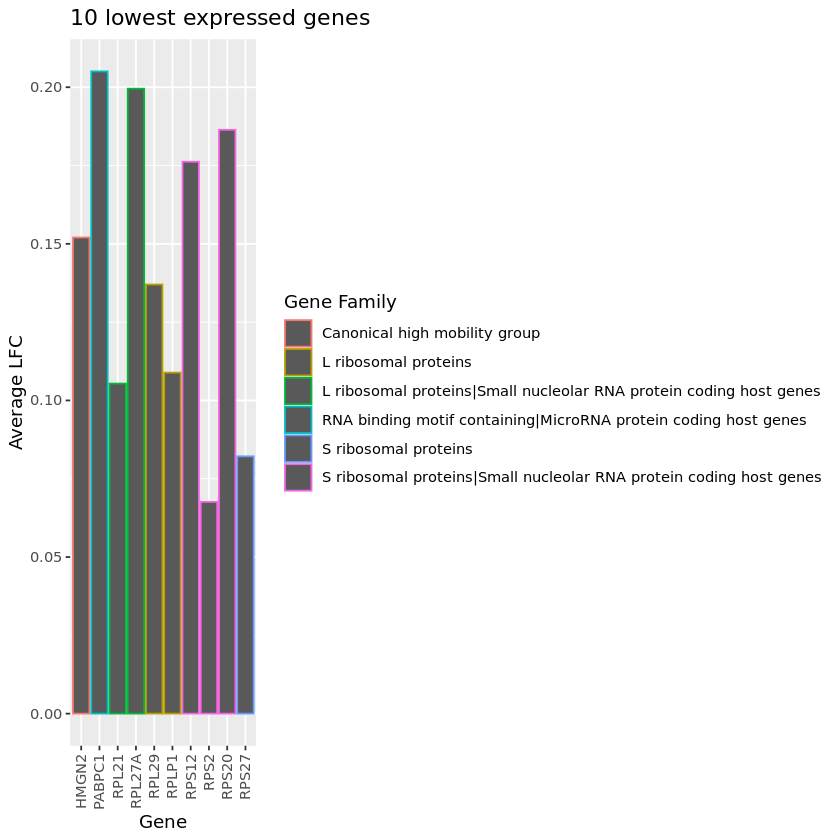

In [33]:
mean_lfc %>%
  #lowest to highest lfc
  arrange(avg_lfc) %>%
  #select last 10 values
  slice(1:10) %>%
  #bar graph
  ggplot(aes(x=symbol, y=avg_lfc, color=gene_group)) +
  geom_col() +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+
  labs(title='10 lowest expressed genes',x='Gene', y='Average LFC', color='Gene Family')
#Created a bar chart using genes in x axis and average lfc in y axis. THe bars are color coded by family group to better
#see the family groups that are lowest in expression levels. 